### Lab Title:  Image Denoising Using Median, Bilateral, NLM and Total Variance.

Denoising using median Filtering:

In [1]:
import cv2
from skimage.filters import median

img_gaussian_noise = cv2.imread("balloons_noisy.png",0)

img_salt_pepper_noise = cv2.imread("salt and paper.jpg",0)

img = img_salt_pepper_noise

median_using_cv2 = cv2.medianBlur(img, 3)

from skimage.morphology import disk

median_using_skimage = median(img, disk(3), mode='constant', cval=0.0)

cv2.imshow("Original", img)
cv2.imshow("Using Cv2", median_using_cv2)
cv2.imshow("Using Skimage", median_using_skimage)

cv2.waitKey(0)
cv2.destroyAllWindows()

Denoising using Bilateral Filtering

In [2]:
import cv2
img_gaussian_noise = cv2.imread("balloons_noisy.png",0)

img_salt_pepper_noise = cv2.imread("salt and paper.jpg",0)
img = img_gaussian_noise

bilateral_using_cv2 = cv2.bilateralFilter(img,5,20,100,borderType=cv2.BORDER_CONSTANT)

from skimage.restoration import denoise_bilateral

bilateral_using_skimage = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=1.5, channel_axis=None)

cv2.imshow("Original", img)
cv2.imshow("Cv2 bilateral", bilateral_using_cv2)
cv2.imshow("Using Skimage bilateral", bilateral_using_skimage)

cv2.waitKey(0)
cv2.destroyAllWindows()


Denoising using NLM filtering:

In [7]:
import cv2
import numpy as np
from  skimage import io,img_as_float
from skimage.restoration import denoise_nl_means,estimate_sigma
gi=img_as_float(io.imread('balloons_noisy.png',as_gray=True))
si=img_as_float(io.imread('salt and paper.jpg',as_gray=True))

img =gi
sigma_est=np.mean(estimate_sigma(img,channel_axis=True))
dni=denoise_nl_means(img,h=1.15*sigma_est,fast_mode=True,patch_size=5,patch_distance=3,channel_axis=None)

cv2.imshow("original",img)
cv2.imshow("m1",dni)

img =si
sigma_est=np.mean(estimate_sigma(img,channel_axis=True))
dni=denoise_nl_means(img,h=1.15*sigma_est,fast_mode=True,patch_size=5,patch_distance=3,channel_axis=None)

cv2.imshow("original1",img)
cv2.imshow("m11",dni)

#cv2.imshow("m2",bui)
cv2.waitKey(0)
cv2.destroyAllWindows()

Denoising Works using Total Variance filtering

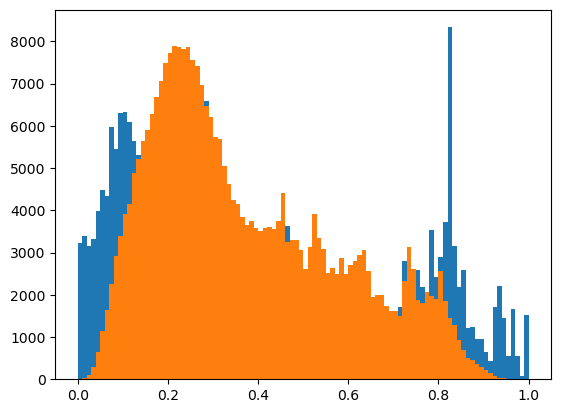

In [8]:
import cv2
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle
from matplotlib import pyplot as plt

img  = img_as_float(io.imread("balloons_noisy.png", as_gray=True))
plt.hist(img.flat, bins=100, range=(0,1))

denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, channel_axis=False)

plt.hist(denoise_img.flat, bins=100, range=(0,1))

cv2.imshow("Original", img)
cv2.imshow("TV Filtered", denoise_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Denoising using Block matching and 3D filtering (BM3D):

In [9]:
from skimage import io, img_as_float
import bm3d
import cv2

noisy_img = img_as_float(io.imread("balloons_noisy.png", as_gray=True))

BM3D_denoise_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

cv2.imshow("Original", noisy_img)
cv2.imshow("BM3D Filtered", BM3D_denoise_image)
cv2.waitKey(0)
cv2.destroyAllWindows()